<a href="https://colab.research.google.com/github/moch1996/Vaycold/blob/main/Python_DL/%EC%97%AC%EB%9F%AC%20%EC%9D%98%EC%83%81%20%EC%82%AC%EC%A7%84%EC%97%90%EC%84%9C%20%EC%98%B7%20%EC%A2%85%EB%A5%98%20%EA%B5%AC%EB%B6%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal :
 - fashion MNIST 이미지를 분류하기
 - Multi-Class & Multi-Label 구분
   - 하나의 사진에 여러 객체가 있을 때 // ex) 한 사진안에 고양이와 독수리가 있을 때 이를 새, 고양이로 분류하는 것
 - 이미지 확장, 이미지에 객체 삽입

## Library

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image
from google.colab import drive

warnings.filterwarnings('ignore')

SEED=34

## 도입전 기본 처리

In [2]:
# fashion MNIST 데이터를 살펴보자
fashion_mnist = keras.datasets.fashion_mnist
((train_images,train_labels),(test_images, test_labels)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
# label을 설정해보자 
# 0이 뭔지 1이 뭔지 모르겠음...
labels = ["T-shirt/top",   #idx 0
          "Trouser",       #idx 1
          "Pullover",      #idx 2
          "Dress",         #idx 3
          "Coat",          #idx 4
          "Sandal",        #idx 5
          "Shirt",         #idx 6
          "Sneaker",       #idx 7
          "Bag",           #idx 8
          "Ankle_boot"]    #idx 9

In [5]:
def idx2label(idx) :
  return labels[idx]

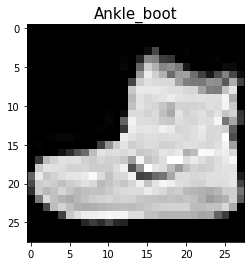


Ankle_boot


In [6]:
# plt로 형태를 출력해보자

plt.imshow(train_images[0], cmap='gray')
plt.title(idx2label(train_labels[0]), size=15)
plt.show()
print('')
print(idx2label(train_labels[0]))

In [7]:
# 이걸 함수로 만들어 볼까

def train_show(idx) :
  plt.imshow(train_images[idx], cmap='gray')
  plt.title(idx2label(train_labels[idx]), size=20)
  plt.show()

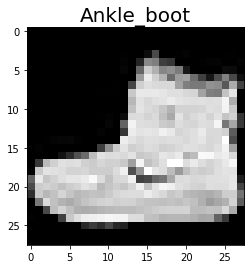

In [8]:
train_show(0)

In [9]:
# train images에서 0이 아닌 값들을 찾아보자

train_images[train_images != 0]

array([ 1, 13, 73, ..., 42, 21, 18], dtype=uint8)

In [10]:
# 이미지의 값이 가장 큰 idx 와 가장 작은 idx를 찾아보자
train_images.reshape((60000,-1)).shape

(60000, 784)

In [11]:
print(train_images.reshape((60000,-1)).sum(axis=1).argmax()) #최대값
print(train_images.reshape((60000,-1)).sum(axis=1).argmin()) #최소값

55023
9230


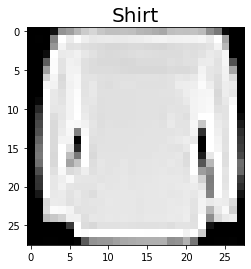

In [12]:
train_show(train_images.reshape((60000,-1)).sum(axis=1).argmax())

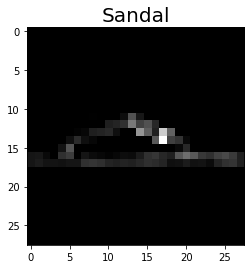

In [13]:
train_show(train_images.reshape((60000,-1)).sum(axis=1).argmin())

## PreProcessing

In [14]:
# Train, Test 이미지 데이터 범위 확인
print(train_images.max(), train_images.min())
print(test_images.max(), test_images.min())

255 0
255 0


In [15]:
print(train_images.dtype)
print(test_images.dtype)

uint8
uint8


In [16]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

In [17]:
# 데이터 정규화

train_images = train_images / 255
test_images = test_images / 255

In [18]:
# 함수로 구현하면 이런 느낌
def norm(data) :
  min_v = data.min()
  max_v = data.max()
  return (data - min_v)/(max_v - min_v)

In [19]:
norm(train_images).min(), norm(train_images).max()

(0.0, 1.0)

## Visualizing

### random

In [20]:
# 랜덤으로 n장을 가져오고 그것의 plt를 그린 후 label까지 불러와보자.
def draw(n) : 
  label_list = []
  idx = list(np.random.randint(0,60001,n))
  pic_n = train_images[idx].transpose((1,0,2)).reshape((28,-1))
  plt.figure(figsize=(10+(n/2), 12))
  plt.imshow(pic_n,cmap='gray')
  plt.show()

  for i in idx :
    label_list.append(idx2label(train_labels[i]))
  print('')
  for j in label_list :
    print(j, sep=' ', end= ' ')
#train_images[list(np.random.randint(0,60000,5))].shape
#np.random.randin

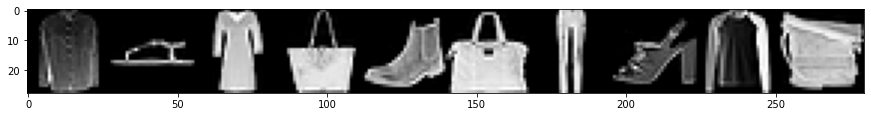


Shirt Sandal Dress Bag Ankle_boot Bag Trouser Sandal Pullover Bag 

In [21]:
draw(10)

### Standard

In [22]:
# (5,28,28) 획득하기
train_images[:5].shape

(5, 28, 28)

In [23]:
# (28,28*5)로 변환하자
train_images[:5].transpose((1,0,2)).reshape((28,-1)).shape

(28, 140)

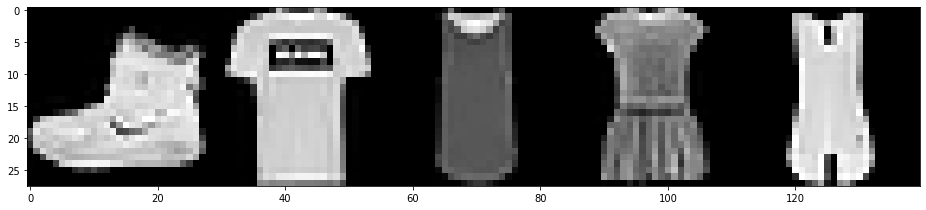

In [24]:
plt.figure(figsize=(16,12))
plt.imshow(train_images[:5].transpose((1,0,2)).reshape((28,-1)),cmap='gray')
plt.show()


In [25]:
# 레이블에 따라 5개를 출력하는 함수를 만들어보자
# argwhere을 사용하자
np.argwhere(train_labels == 7)[:5,...,0] # 뒤에 ...,0은 펴주는 역할을 수행함

array([ 6, 14, 41, 46, 52])

In [26]:
train_images[np.argwhere(train_labels == 7)[:5,...,0]].transpose((1,0,2)).reshape(28,-1).shape

(28, 140)

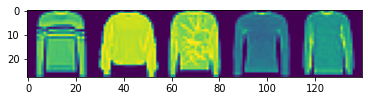

In [27]:
plt.imshow(train_images[np.argwhere(train_labels == 2)[:5,...,0]].transpose((1,0,2)).reshape(28,-1))
plt.show()

## Data Augmentation
 - 이미지 확대 및 다객체 추가 방법

In [28]:
# 이미지 한장의 크기를 4배로 확대하고, 객체는 4분면 영역중 랜덤으로 1공간에 넣는 함수를 작성해보자

def expand(img) :
  bg = np.zeros(img.shape)
  # 1 0
  # 2 3
  idx = np.random.randint(0,4)
  slots = [bg,bg,bg,bg]
  slots[idx] = img
  expanded = np.vstack([
                        np.hstack(slots[:2]), 
                        np.hstack(slots[2:])
                        
  ]
  )
  return expanded

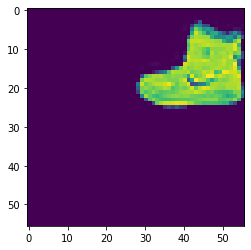

In [29]:
plt.imshow(expand(train_images[0]))

In [30]:
expand(train_images[0]).shape

(56, 56)

In [31]:
# 전체 training셋과 test셋에 적용해보자.
train_expand_images = np.array([expand(img) for img in train_images])
test_expand_images = np.array([expand(img) for img in test_images])

In [32]:
train_expand_images.shape, test_expand_images.shape

((60000, 56, 56), (10000, 56, 56))

In [33]:
# 4배 이미지 변환함수를 수정하여 이미지 사이즈를 4배 확대 후 객체를 랜덤으로 0~4개 랜덤 4분면에 위치시키는 함수를 만들어보자
# 이 과정을 수행하고 나면 하나의 그림에 여러 그림이 들어 갈 수 있으므로 라벨링을 다르게 해줘야 함.
# 그래서 인자가 두 개 필요함
'''
def expand_2(x,y) :

  images = []
  labels = []

  for _ in range(4) :
    bg = np.zeros((28,28))
    idx = np.random.randint(0,5)

    label = np.zeros((10,)) #[0,0,0,.....] 
    slots = [bg, bg, bg, bg]
    
  



  bg = np.zeros(img.shape)
  # 1 0
  # 2 3
  idx = np.random.randint(0,4)
  slots = [bg,bg,bg,bg]
  slots[idx] = img
  expanded = np.vstack([
                        np.hstack(slots[:2]), 
                        np.hstack(slots[2:])
                        
  ]
  )
  return expanded
  '''

'\ndef expand_2(x,y) :\n\n  images = []\n  labels = []\n\n  for _ in range(4) :\n    bg = np.zeros((28,28))\n    idx = np.random.randint(0,5)\n\n    label = np.zeros((10,)) #[0,0,0,.....] \n    slots = [bg, bg, bg, bg]\n    \n  \n\n\n\n  bg = np.zeros(img.shape)\n  # 1 0\n  # 2 3\n  idx = np.random.randint(0,4)\n  slots = [bg,bg,bg,bg]\n  slots[idx] = img\n  expanded = np.vstack([\n                        np.hstack(slots[:2]), \n                        np.hstack(slots[2:])\n                        \n  ]\n  )\n  return expanded\n  '

In [37]:
from tensorflow.keras.utils import to_categorical

In [38]:
def multi_plot(x,y,iterations=3) :
  for iter in range(iterations) :
  
    bg = np.zeros((28,28))
    quad = [0, 1, 2, 3]  # 4분면
    pick = np.random.randint(1,5) # 몇 개를 뽑을 지 랜덤으로 정한다 # 최소 1개는 나오게하자;;
    pic_bg = list(np.random.choice(quad,pick, replace=False)) # 그림이 그려질 사분면
    pic_n  = list(np.random.choice(range(x.shape[0]),pick, replace=False)) # 그림을 미리 뽑는다.
    slots = [bg, bg, bg, bg]

    labels = np.zeros((10,))
    for a,b in zip(pic_bg, pic_n) :
      slots[a] = x[b]
      labels += to_categorical(y[b],10)

    picture = np.vstack([
                        np.hstack(slots[:2]),
                        np.hstack(slots[2:])
    ])


    labels[labels >=1 ] = 1
    plt.imshow(picture)
    plt.show()
    print(labels)
    for idx in list(np.argwhere(labels==1).reshape(-1)) :
      print(idx2label(idx))
    print('\n')
  #return picture, labels

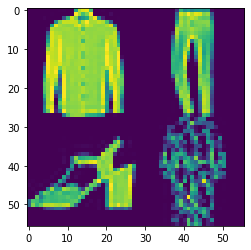

[0. 1. 0. 0. 1. 1. 1. 0. 0. 0.]
Trouser
Coat
Sandal
Shirt




In [39]:
multi_plot(train_images, train_labels,1)

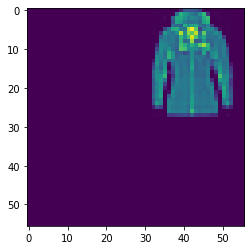

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Coat




In [40]:
multi_plot(test_images, test_labels,1)

In [42]:
# ploting말고 값을 출력하는 함수를 다시 만들어보자
def expand_bc(x,y) :
  bg = np.zeros(x.shape[1:3])
  quad = [0,1,2,3]
  pick = np.random.randint(1,5)
  pic_bg = list(np.random.choice(quad,pick, replace=False))
  pic_n  = list(np.random.choice(range(x.shape[0]),pick, replace=False))
  slots = [bg, bg, bg, bg]

  labels = np.zeros((len(np.unique(y)),))

  for a,b in zip(pic_bg, pic_n) :
    slots[a] = x[b]
    labels += to_categorical(y[b],len(np.unique(y)))
  
  labels[labels >=1] =1
  labels = labels.astype(int)
  picture = np.vstack([
                        np.hstack(slots[:2]),
                        np.hstack(slots[2:])
    ])
  return picture, labels


In [43]:
h = expand_bc(train_images, train_labels)

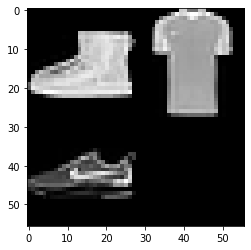

In [44]:
plt.imshow(h[0],cmap='gray')
plt.show()

In [45]:
# 4배 이미지 변환을 전체 train/ test 데이터에 실행하여 train_multi_images, train_multi_labels, test_multi_images, test_multi_labels 를 생성하자

train_multi_images, train_multi_labels = list(zip(*[expand_bc(train_images, train_labels) for i in train_images]))
test_multi_images, test_multi_labels = list(zip(*[expand_bc(test_images, test_labels) for i in test_images]))

In [51]:
# 위에 꺼 돌리는데 15분 13초 걸렸다... 뭔가 좀 이상하다...
# 함수를 다르게 한번 짜보자

def expand_4times(x_data,y_data) :
  images = []
  labels = []

  for _ in range(4) :
    bg = np.zeros((28,28))
    obj_count = np.random.randint(0,5)

    label = np.zeros((10,))
    slots = [bg, bg,bg,bg]

    for idx in range(obj_count) :
      i = np.random.randint(len(x_data))
      slots[idx] = x_data[i]
      label += tf.keras.utils.to_categorical(y_data[i],10)
    
    np.random.shuffle(slots)
  
  new_img = np.vstack([
                       np.hstack(slots[:2]),
                       np.hstack(slots[2:])
  ])

  images.append(new_img)
  labels.append((label >=1).astype(np.int))
  return np.array(images), np.array(labels)

In [52]:
train_multi_images, train_multi_labels = list(zip(*[expand_4times(train_images, train_labels) for i in train_images]))
test_multi_images, test_multi_labels = list(zip(*[expand_4times(test_images, test_labels) for i in test_images]))

In [53]:
# 뭐지 14초가 걸렸다.... 뭐가 문제일까...